In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read data
data=pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [3]:
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
150478,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150479,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150480,5UXTA6C08P,Snohomish,Mountlake Terrace,WA,98043.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,240473950,POINT (-122.30842 47.78416),PUGET SOUND ENERGY INC,5.306105e+10


In [4]:
## Column info

VIN (1-10): This is a part of the vehicle's unique identification number, kind of like a fingerprint for cars. The first 10 characters tell a bit about the car, like who made it and when.

County: The county where the car is registered, like "Los Angeles County" or "King County."

City: The city where the vehicle is registered, such as "Seattle" or "San Francisco."

State: The state where the vehicle is registered, shown as a two-letter code like "CA" for California.

Postal Code: The ZIP code of the area where the vehicle is registered. It's stored as a number.

Model Year: The year the vehicle was made, like 2018 or 2020.

Make: The brand of the vehicle, such as Tesla or Nissan.

Model: The specific type of the vehicle, like "Model S" or "Leaf."

Electric Vehicle Type: The kind of electric vehicle it is, like a fully electric car (BEV) or a hybrid (PHEV).

CAFV Eligibility: Tells you if the vehicle qualifies for special clean fuel programs or benefits.

Electric Range: How far the vehicle can go on a full charge, usually in miles.

Base MSRP: The original price of the vehicle when it was new.

Legislative District: The political district where the vehicle is registered, which could be used for government purposes.

DOL Vehicle ID: A unique number given to the vehicle by the Department of Licensing, like an ID for the vehicle.

Vehicle Location: Specific details about where the vehicle is located, sometimes even including coordinates.

Electric Utility: The name of the electric company that supplies power to where the vehicle is registered.

2020 Census Tract: A small area used for gathering statistics during the 2020 Census. This tells you where the vehicle is within that area.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [6]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,150479.000000,150482.000000,150482.000000,150482.000000,150141.000000,1.504820e+05,1.504790e+05
mean,98168.344154,2020.005436,67.877839,1312.644735,29.343950,2.111122e+08,5.297195e+10
std,2473.612184,3.015209,96.230009,9231.310215,14.824829,8.196388e+07,1.638841e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.693473e+08,5.303301e+10
50%,98122.000000,2021.000000,18.000000,0.000000,33.000000,2.150306e+08,5.303303e+10
75%,98370.000000,2023.000000,97.000000,0.000000,43.000000,2.399119e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [7]:
# Find null values

In [8]:
data.isna().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [9]:
#drop null value and unuseful column

In [10]:
data.drop(columns=["VIN (1-10)","Postal Code","DOL Vehicle ID","Vehicle Location","2020 Census Tract"],inplace=True)

In [11]:
data.dropna(inplace=True)

In [12]:
data

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,PACIFICORP
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...,...,...
150477,Grays Harbor,Montesano,WA,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...
150478,King,Seattle,WA,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
150479,King,Seattle,WA,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
150480,Snohomish,Mountlake Terrace,WA,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,PUGET SOUND ENERGY INC


In [13]:
#Count of Vehicles by Type:

data["Electric Vehicle Type"].value_counts()

Battery Electric Vehicle (BEV)            116585
Plug-in Hybrid Electric Vehicle (PHEV)     33556
Name: Electric Vehicle Type, dtype: int64

In [14]:
#Average Electric Range by Make:

data.groupby("Make")["Electric Range"].mean().sort_values(ascending=False)

Make
JAGUAR                  204.236842
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
CHEVROLET                95.326391
TESLA                    90.237006
FIAT                     85.626551
NISSAN                   84.728804
SMART                    62.375912
AZURE DYNAMICS           56.000000
AUDI                     53.507338
KIA                      52.662033
PORSCHE                  46.629017
HONDA                    46.626238
BMW                      38.207905
POLESTAR                 36.034076
ALFA ROMEO               33.000000
FISKER                   33.000000
CHRYSLER                 32.242574
MITSUBISHI               29.793632
VOLKSWAGEN               28.352608
TOYOTA                   26.892417
MAZDA                    26.000000
HYUNDAI                  24.000948
LINCOLN                  23.640351
LEXUS                    22.521739
JEEP                     22.326531
LAND ROVER               21.782609
MINI                     20.826802
CADILLAC       

<AxesSubplot:xlabel='Make'>

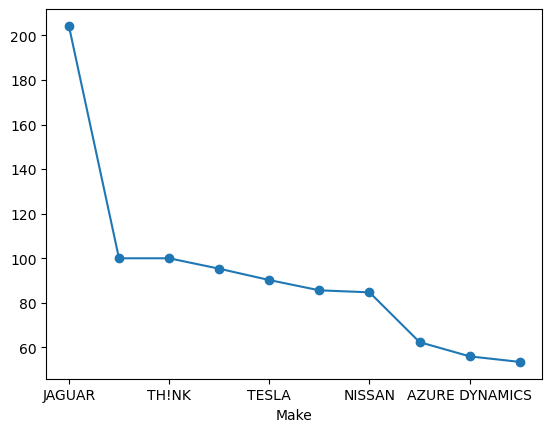

In [15]:
data.groupby("Make")["Electric Range"].mean().sort_values(ascending=False).head(10).plot(kind='line', marker='o')

### conclusion:
     The highest-ranked makes offer the longest average electric ranges.
      Brands with shorter ranges may prioritize plug-in hybrids or other models with less focus on long-range electric travel.

In [16]:
# number of vehicle type according to the country

data.groupby("County")["Electric Vehicle Type"].value_counts().unstack().unstack().unstack()

County,Adams,Asotin,Benton,Chelan,Clallam,Clark,Columbia,Cowlitz,Douglas,Ferry,...,Skamania,Snohomish,Spokane,Stevens,Thurston,Wahkiakum,Walla Walla,Whatcom,Whitman,Yakima
Electric Vehicle Type,,,,,,,,,,,,,,,,,,,,,
Battery Electric Vehicle (BEV),29.0,39.0,1223.0,696.0,616.0,6435.0,17.0,529.0,226.0,20.0,...,109.0,14115.0,2512.0,124.0,3926.0,31.0,243.0,2733.0,181.0,566.0
Plug-in Hybrid Electric Vehicle (PHEV),12.0,24.0,577.0,167.0,304.0,2414.0,1.0,233.0,68.0,4.0,...,55.0,3192.0,1178.0,69.0,1477.0,18.0,117.0,935.0,81.0,269.0


In [17]:
# number of vehicle according to the model year

data.groupby("Model Year")["Electric Vehicle Type"].count()

Model Year
1997        1
1998        1
1999        4
2000        8
2002        2
2003        1
2008       18
2010       24
2011      795
2012     1630
2013     4555
2014     3598
2015     4919
2016     5632
2017     8552
2018    14407
2019    10693
2020    11263
2021    18610
2022    27734
2023    37052
2024      642
Name: Electric Vehicle Type, dtype: int64

In [18]:
# number of vehicle with type according to the model year

data.groupby("Model Year")["Electric Vehicle Type"].value_counts().unstack()

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Model Year,,
1997,1.0,NaN
1998,1.0,NaN
1999,4.0,NaN
2000,8.0,NaN
2002,2.0,NaN
2003,1.0,NaN
2008,18.0,NaN
2010,21.0,3.0
2011,717.0,78.0


<AxesSubplot:xlabel='Model Year'>

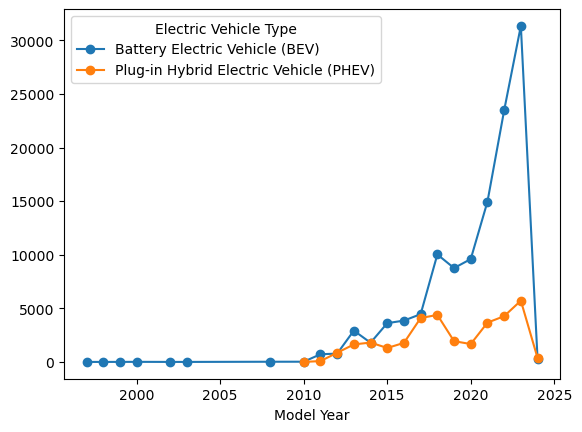

In [19]:
# number of vehicle with type according to the model year

data.groupby("Model Year")["Electric Vehicle Type"].value_counts().unstack().plot(kind='line', marker='o')

   ### Conclusion:
        before 2010 there is no PHEV vehicle ,,it rise from 2010 but BEV vehicle rise more than PHEV since 2000 to 2025 . 
        it means count of BEV vehicle is more than the count of PHEV vehicle .

In [20]:
# no. of vehicle according to make

In [21]:
data.groupby("Make")["Electric Vehicle Type"].value_counts().unstack().unstack().unstack()

Make,ALFA ROMEO,AUDI,AZURE DYNAMICS,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,FIAT,FISKER,...,PORSCHE,RIVIAN,SMART,SUBARU,TESLA,TH!NK,TOYOTA,VOLKSWAGEN,VOLVO,WHEEGO ELECTRIC CARS
Electric Vehicle Type,,,,,,,,,,,,,,,,,,,,,
Battery Electric Vehicle (BEV),NaN,1656.0,9.0,NaN,1793.0,83.0,7128.0,NaN,806.0,NaN,...,547.0,2482.0,274.0,559.0,68821.0,5.0,188.0,4064.0,1181.0,NaN
Plug-in Hybrid Electric Vehicle (PHEV),12.0,1342.0,NaN,2.0,4633.0,92.0,4876.0,2626.0,NaN,16.0,...,480.0,NaN,NaN,63.0,NaN,NaN,5008.0,NaN,2348.0,3.0


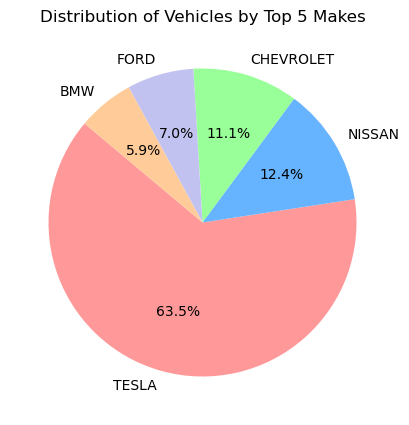

In [22]:
## Distribution of Vehicles by Top 5 Makes'

Distribution = data['Make'].value_counts().head(5)

plt.figure(figsize=(5, 5))

color = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0', '#ffcc99']
plt.pie(Distribution, labels=Distribution.index, autopct='%1.1f%%', startangle=140,colors=color)


plt.title('Distribution of Vehicles by Top 5 Makes')

# Display the pie chart
plt.show()


    Tesla has largest 63.5% of the vehicles
     Nissan and Chevrolet follow, with 12.4% and 11.1% respectively, showing significant but much smaller shares compared to Tesla.
    Ford has 7.0% and BMW has 5.9%, representing the smallest count among the top 5 makes, but still contributing notably to the overall distribution.